# Load the image

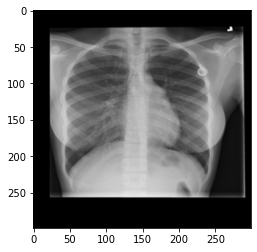

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("Normal-1.png")
plt.imshow(image)

# Resize the image

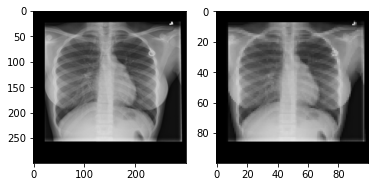

In [2]:
resize = cv2.resize(image, (100,100))

plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(resize)

# Normalize the image

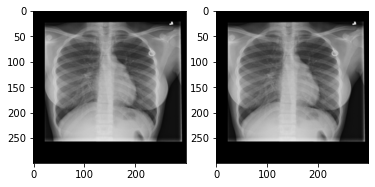

In [3]:
normalize = image / 255.

plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(normalize)

# Blur the image

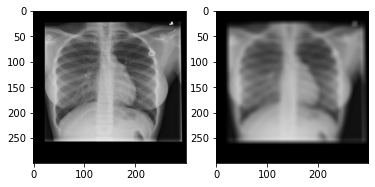

In [4]:
blurred = cv2.blur(image, (10,10))

plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(blurred)

# Binarize Image

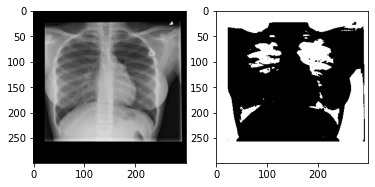

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(thresh, cmap = 'gray')

# Erosion on image

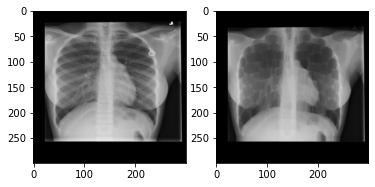

In [6]:
erode = cv2.erode(image, (5,5), iterations = 10)
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(erode)

# Dilation on Image

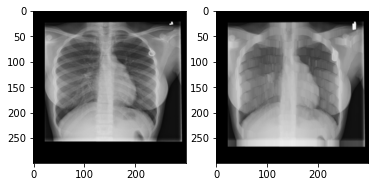

In [7]:
dilate = cv2.dilate(image, (5,5), iterations = 10)
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(dilate)

# Generate image from the data Augmentation

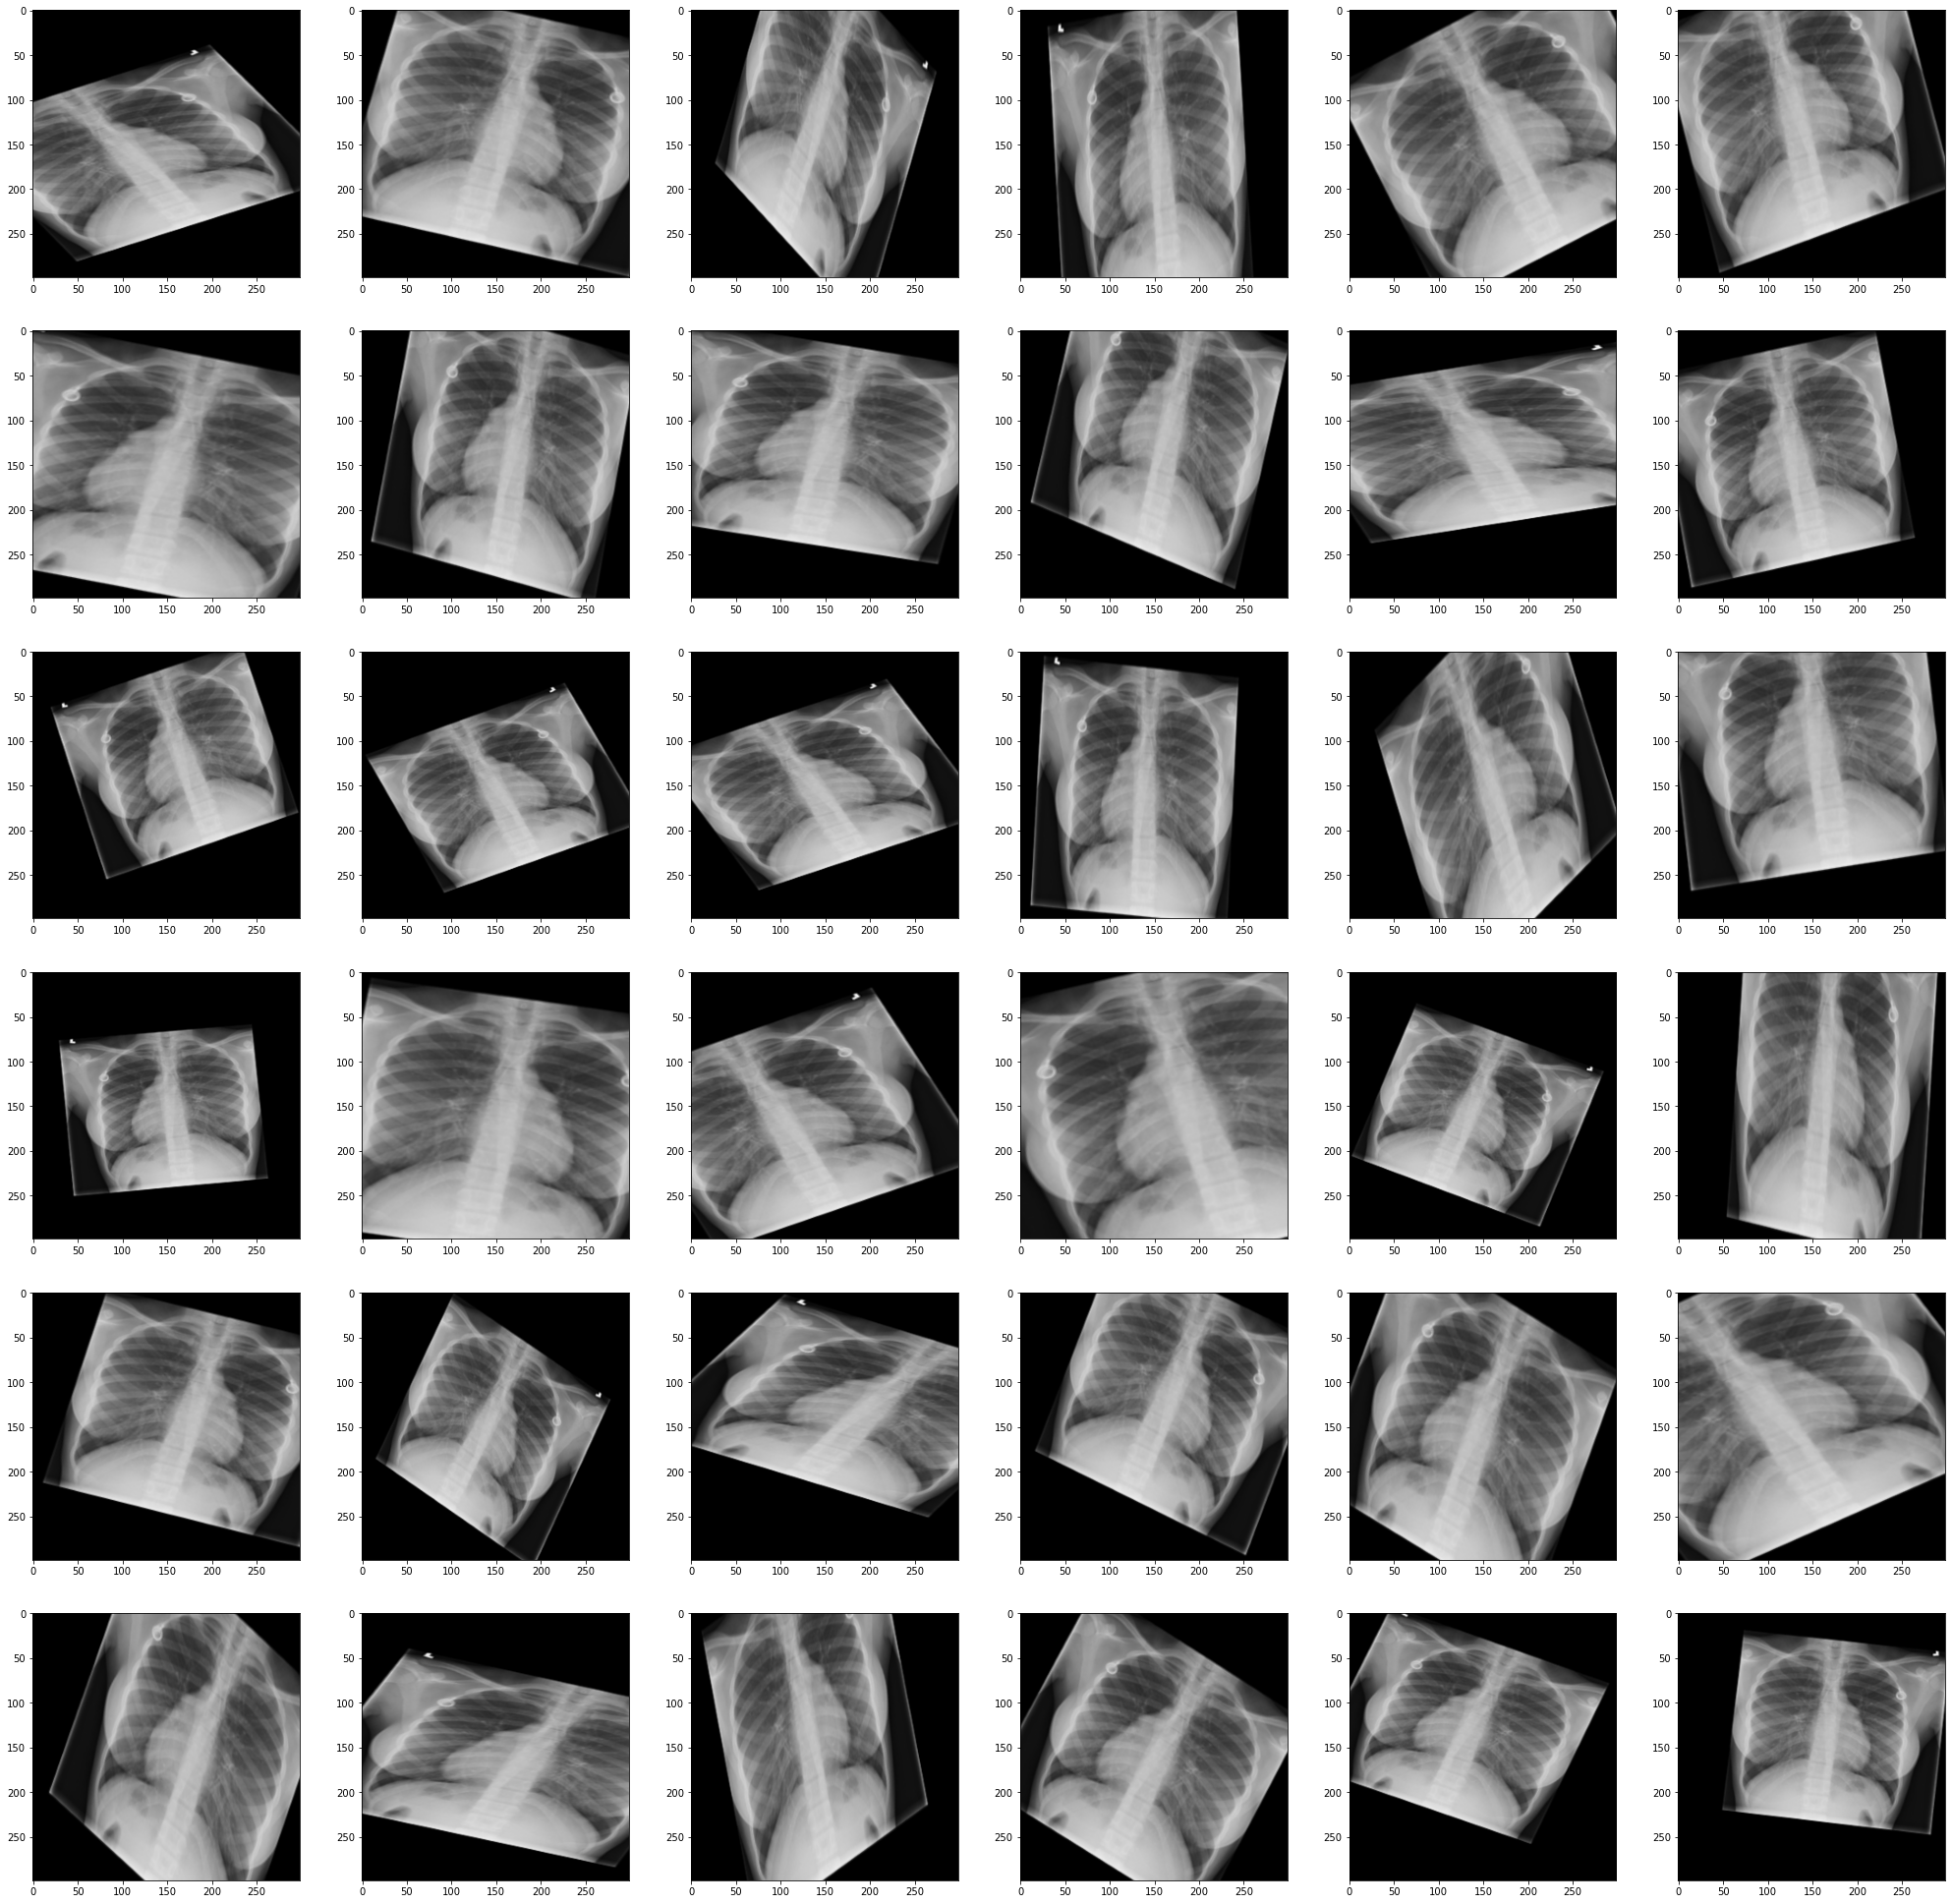

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=30,  # rotate the image 30 degrees
                               width_shift_range=0.1,
                               # Shift the pic width by a max of 10%
                               height_shift_range=0.1,
                               # Shift the pic height by a max of 10%
                               rescale=1 / 255,  # Rescale the image by normalzing it.
                               shear_range=0.2,
                               # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.4,  # Zoom in by 20% max
                               horizontal_flip=True,  # Allo horizontal flipping
                               fill_mode='nearest'
                               # Fill in missing pixels with the nearest filled value
                               )
plt.figure(figsize = (35,35))
count = 1
for row in range(6):
    for col in range(6):
        plt.subplot(6,6,count)
        subplot = image_gen.random_transform(image)
        plt.imshow(subplot)
        count += 1

# Extracting background

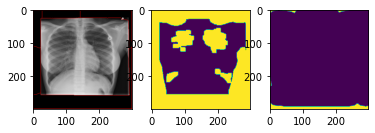

In [11]:
# Further noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

plt.subplot(1,3,1)
plt.imshow(image)
plt.subplot(1,3,2)
plt.imshow(sure_bg)
plt.subplot(1,3,3)
plt.imshow(sure_fg)

# Marking Foreground

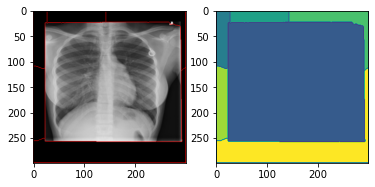

In [10]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]

plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(markers)